# 02. Работа с данными: NumPy, Pandas и визуализация

В этом блокноте мы разберём:
- **NumPy**: массивы и базовые операции.
- **Pandas**: таблицы (`DataFrame`), загрузка и просмотр данных.
- **Базовую визуализацию** с помощью `matplotlib` и `seaborn`.

Цель — получить практические навыки работы с табличными данными, которые далее будем использовать во всех задачах машинного обучения.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

print("Версии библиотек:")
print("NumPy:", np.__version__)
print("Pandas:", pd.__version__)

Версии библиотек:
NumPy: 2.4.2
Pandas: 3.0.1


## 1. NumPy: базовые операции с массивами

`NumPy` — это библиотека для эффективных вычислений с многомерными массивами.

Ключевые идеи:
- Массив `ndarray` хранит данные **одного типа**.
- Операции выполняются **поэлементно** и очень быстро (написаны на C).
- Поддерживаются векторные и матричные операции.

Попробуем создать несколько массивов и выполнить над ними базовые операции.

In [2]:
# Создание массивов

arr1 = np.array([1, 2, 3, 4, 5])
arr2 = np.arange(0, 10, 2)  # от 0 до 10 с шагом 2
arr3 = np.linspace(0, 1, 5)  # 5 равномерных точек от 0 до 1

print("arr1:", arr1)
print("arr2:", arr2)
print("arr3:", arr3)

# Базовые операции
print("arr1 + 10:", arr1 + 10)
print("arr1 * 2:", arr1 * 2)
print("arr1 ** 2:", arr1 ** 2)

print("Скалярное произведение arr1 · arr1:", np.dot(arr1, arr1))

arr1: [1 2 3 4 5]
arr2: [0 2 4 6 8]
arr3: [0.   0.25 0.5  0.75 1.  ]
arr1 + 10: [11 12 13 14 15]
arr1 * 2: [ 2  4  6  8 10]
arr1 ** 2: [ 1  4  9 16 25]
Скалярное произведение arr1 · arr1: 55


### Задание 1 (NumPy)

1. Создайте массив из чисел от 0 до 20 включительно и выведите только чётные элементы.
2. Создайте двумерный массив размером $3 \times 4$ со значениями от 0 до 11. Выведите:
   - вторую строку,
   - третий столбец,
   - элемент в позиции (2-я строка, 4-й столбец).
3. Сгенерируйте 100 случайных чисел из нормального распределения (`np.random.randn(100)`) и посчитайте их среднее и стандартное отклонение.

In [3]:
# Решение задания 1 (NumPy)
# 1. Массив 0..20, только чётные
arr = np.arange(0, 21)
evens = arr[arr % 2 == 0]
print("Чётные от 0 до 20:", evens)

# 2. Массив 3x4 (значения 0–11), вторая строка, третий столбец, элемент [1,3]
mat = np.arange(12).reshape(3, 4)
print("Вторая строка:", mat[1, :])
print("Третий столбец:", mat[:, 2])
print("Элемент (2-я строка, 4-й столбец):", mat[1, 3])

# 3. 100 случайных из N(0,1), среднее и std
rnd = np.random.randn(100)
print("Среднее:", rnd.mean(), ", std:", rnd.std())

Чётные от 0 до 20: [ 0  2  4  6  8 10 12 14 16 18 20]
Вторая строка: [4 5 6 7]
Третий столбец: [ 2  6 10]
Элемент (2-я строка, 4-й столбец): 7
Среднее: -0.08163213185471126 , std: 0.9054222181792054


## 2. Pandas: работа с табличными данными

`Pandas` предоставляет две основные структуры данных:
- `Series` — одномерный массив с индексами.
- `DataFrame` — таблица (как в Excel или SQL-таблица).

Частые операции:
- чтение данных из файла (`read_csv`, `read_excel` и др.),
- просмотр первых/последних строк (`head`, `tail`),
- информация о типах данных (`info`),
- базовая статистика (`describe`).

In [4]:
# Создадим небольшой DataFrame

data = {
    "age": [25, 30, 22, 35, 28, 27, 32, 24, 40, 29, 26, 38, 31, 23, 33],
    "salary": [50000, 60000, 45000, 80000, 52000, 58000, 72000, 48000, 95000, 61000, 54000, 88000, 67000, 46000, 75000],
    "city": ["Moscow", "SPb", "Kazan", "Moscow", "Novosibirsk", "SPb", "Moscow", "Kazan", "Moscow", "Novosibirsk", "SPb", "Moscow", "Kazan", "SPb", "Moscow"],
}

df = pd.DataFrame(data)

display(df)
print("\nИнформация о DataFrame:")
print(df.info())

print("\nБазовая статистика по числовым столбцам:")
display(df.describe())

,age,salary,city
0,25,50000,Moscow
1,30,60000,SPb
2,22,45000,Kazan
3,35,80000,Moscow
4,28,52000,Novosibirsk
5,27,58000,SPb
6,32,72000,Moscow
7,24,48000,Kazan
8,40,95000,Moscow
9,29,61000,Novosibirsk



Информация о DataFrame:
<class 'pandas.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     15 non-null     int64
 1   salary  15 non-null     int64
 2   city    15 non-null     str  
dtypes: int64(2), str(1)
memory usage: 492.0 bytes
None

Базовая статистика по числовым столбцам:


,age,salary
count,15.000000,15.000000
mean,29.533333,63400.000000
std,5.370111,15637.866131
min,22.000000,45000.000000
25%,25.500000,51000.000000
50%,29.000000,60000.000000
75%,32.500000,73500.000000
max,40.000000,95000.000000


### Частые операции с DataFrame

```python
# выбор столбца
ages = df["age"]

# несколько столбцов
subset = df[["age", "salary"]]

# логическая фильтрация
high_salary = df[df["salary"] > 55000]

# группировка
by_city = df.groupby("city")["salary"].mean()
```

Такие операции являются основой подготовки данных перед обучением моделей.

### Задание 2 (Pandas)

1. Добавьте в `df` новый столбец `age_group`, где:
   - до 25 лет — значение `"young"`,
   - от 25 до 30 включительно — `"adult"`,
   - старше 30 — `"senior"`.
2. Посчитайте среднюю зарплату по каждой группе `age_group`.
3. Отфильтруйте строки, где город — `"Moscow"` и зарплата выше 55000.

(Рекомендуется писать код в отдельных ячейках под этим заданием.)

In [5]:
# Решение задания 2 (Pandas)
# 1. Столбец age_group
df["age_group"] = "young"
df.loc[(df["age"] > 25) & (df["age"] <= 30), "age_group"] = "adult"
df.loc[df["age"] > 30, "age_group"] = "senior"
display(df)

# 2. Средняя зарплата по age_group
print(df.groupby("age_group")["salary"].mean())

# 3. Фильтр: Москва и зарплата > 55000
moscow_high = df[(df["city"] == "Moscow") & (df["salary"] > 55000)]
display(moscow_high)

,age,salary,city,age_group
0,25,50000,Moscow,young
1,30,60000,SPb,adult
2,22,45000,Kazan,young
3,35,80000,Moscow,senior
4,28,52000,Novosibirsk,adult
5,27,58000,SPb,adult
6,32,72000,Moscow,senior
7,24,48000,Kazan,young
8,40,95000,Moscow,senior
9,29,61000,Novosibirsk,adult


age_group
adult     57000.0
senior    79500.0
young     47250.0
Name: salary, dtype: float64


,age,salary,city,age_group
3,35,80000,Moscow,senior
6,32,72000,Moscow,senior
8,40,95000,Moscow,senior
11,38,88000,Moscow,senior
14,33,75000,Moscow,senior


## 3. Визуализация данных

Визуализация помогает:
- увидеть распределения признаков,
- обнаружить выбросы,
- заметить зависимость между переменными.

Мы будем использовать `matplotlib` (базовая библиотека) и `seaborn` (надстройка с более удобными стилями).

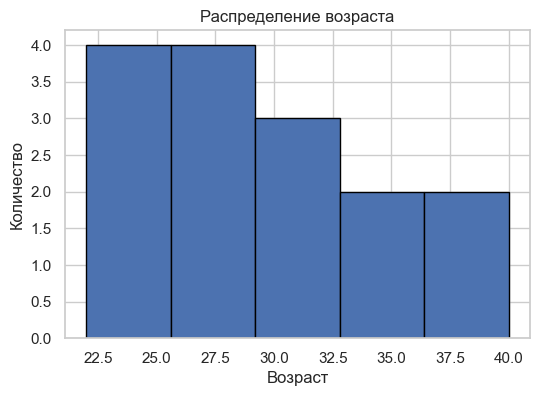

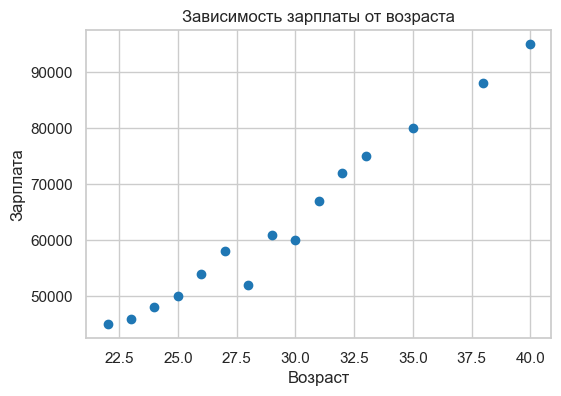

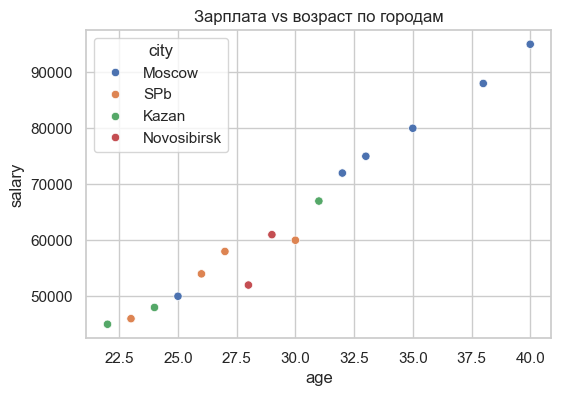

In [6]:
# Гистограмма возраста
plt.figure(figsize=(6, 4))
plt.hist(df["age"], bins=5, edgecolor="black")
plt.title("Распределение возраста")
plt.xlabel("Возраст")
plt.ylabel("Количество")
plt.show()

# Диаграмма рассеяния (salary vs age)
plt.figure(figsize=(6, 4))
plt.scatter(df["age"], df["salary"], c="tab:blue")
plt.title("Зависимость зарплаты от возраста")
plt.xlabel("Возраст")
plt.ylabel("Зарплата")
plt.show()

# То же с seaborn
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x="age", y="salary", hue="city")
plt.title("Зарплата vs возраст по городам")
plt.show()

### Задание 3 (визуализация)

1. Постройте гистограмму зарплат (`salary`) с другим количеством корзин (`bins=3`, `bins=10`) и сравните результат.
2. Постройте `boxplot` (ящик с усами) для зарплат по городам (`sns.boxplot(x="city", y="salary", data=df)`). Какой город кажется наиболее высокооплачиваемым?
3. Сгенерируйте самостоятельно новые данные (например, рост и вес людей) и постройте диаграмму рассеяния. Попробуйте интерпретировать получившееся изображение.

В следующих ноутбуках мы будем использовать `NumPy`, `Pandas` и визуализацию при анализе реальных наборов данных и обучении моделей.

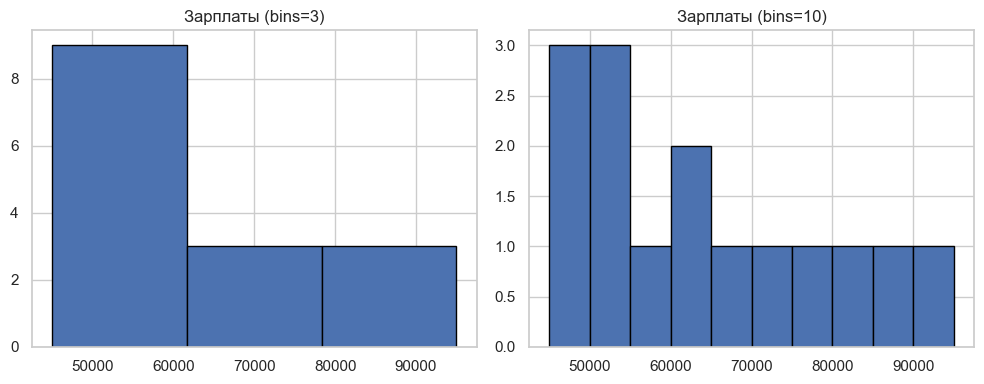

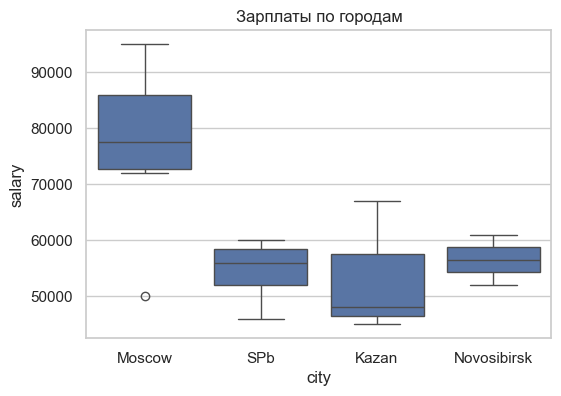

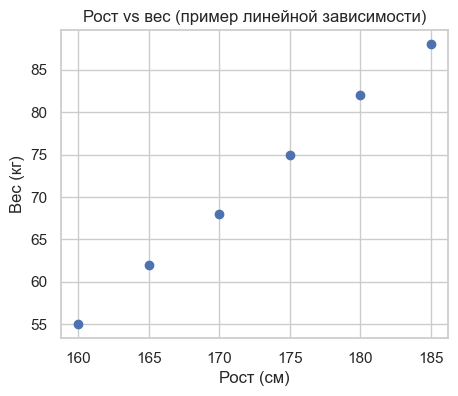

In [7]:
# Решение задания 3 (визуализация)
# 1. Гистограммы зарплат с bins=3 и bins=10
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].hist(df["salary"], bins=3, edgecolor="black")
axes[0].set_title("Зарплаты (bins=3)")
axes[1].hist(df["salary"], bins=10, edgecolor="black")
axes[1].set_title("Зарплаты (bins=10)")
plt.tight_layout()
plt.show()

# 2. Boxplot по городам
plt.figure(figsize=(6, 4))
sns.boxplot(x="city", y="salary", data=df)
plt.title("Зарплаты по городам")
plt.show()
# Moscow имеет самый высокий разброс и высокооплачиваемых; в среднем наиболее высокооплачиваемый — Moscow.

# 3. Свои данные: рост и вес
height = np.array([160, 165, 170, 175, 180, 185])
weight = np.array([55, 62, 68, 75, 82, 88])
plt.figure(figsize=(5, 4))
plt.scatter(height, weight)
plt.xlabel("Рост (см)")
plt.ylabel("Вес (кг)")
plt.title("Рост vs вес (пример линейной зависимости)")
plt.show()